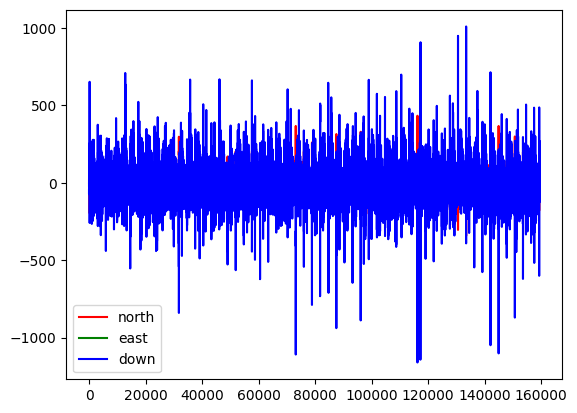

In [1]:
import os

from analyst.viewhandler import  viewnedpreprocoverview
from config.configutil import getpath

viewnedpreprocoverview(getpath('preprocpath','alic'))

F:\试验数据\unmodel_error_igs_data\2018_9_1_10_31\alic\kinematic\preproc\alic2450.npz
F:\试验数据\unmodel_error_igs_data\2018_9_1_10_31\alic\kinematic\preproc\alic2460.npz
F:\试验数据\unmodel_error_igs_data\2018_9_1_10_31\alic\kinematic\preproc\alic2470.npz


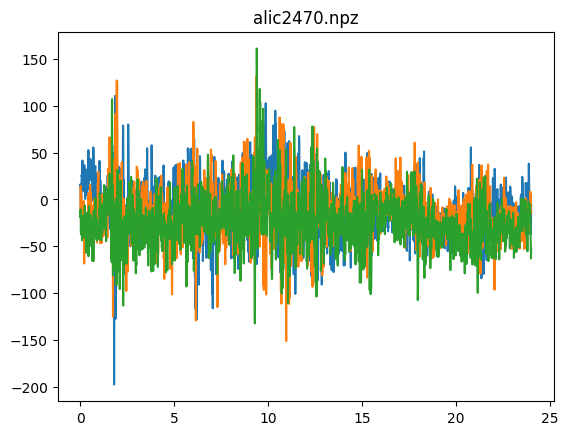

In [23]:
from analyst.viewhandler import viewPreproc
import numpy as np

viewPreproc(getpath('preprocpath','alic'), np.arange(0,3))

In [2]:
from numpy.random import random
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# 期望输入数据尺寸: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # 返回维度为 32 的向量序列
model.add(LSTM(32, return_sequences=True))  # 返回维度为 32 的向量序列
model.add(LSTM(32))  # 返回维度为 32 的单个向量
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()
# 生成虚拟训练数据
x_train = random((1000, timesteps, data_dim))
y_train = random((1000, num_classes))

# 生成虚拟验证数据
x_val = random((100, timesteps, data_dim))
y_val = random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 32)             6272      
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 32)             8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
16/16 [==============================] - 5s 62ms/step - loss: 11.6632 - accuracy: 0.0970 - val_loss: 12.1158 - val_accuracy: 0.0500
Epoch 2/5
16/16 [==============================] - 0s 7ms/step - loss: 12.1713 - accuracy: 0.0910 - val_loss